In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_t=pd.read_csv('/content/drive/MyDrive/TikTok.csv')
df_i=pd.read_csv('/content/drive/MyDrive/Instagram.csv')
df_y=pd.read_csv('/content/drive/MyDrive/Youtube.csv')
df_tc=pd.read_csv('/content/drive/MyDrive/TikTok_Collab.csv')
df_yc=pd.read_csv('/content/drive/MyDrive/Youtube_Collab.csv')
df_ic=pd.read_csv('/content/drive/MyDrive/Instagram_Collab.csv')


# Tiktok data set analysis

In [ ]:
df_t.head(3)

,Tiktoker_Name,Tiktok_Name,Subscribers_Count,Avg_Views,Avg_Likes,Avg_Comments,Avg_Shares
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K


In [ ]:
df_t.isnull().sum()

Tiktoker_Name        0
Tiktok_Name          2
Subscribers_Count    0
Avg_Views            0
Avg_Likes            0
Avg_Comments         0
Avg_Shares           0
dtype: int64

In [ ]:
df_t['Subscribers_Count'].str[-1].value_counts()

M    797
K    203
Name: Subscribers_Count, dtype: int64

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(len(df_tc)):
    G.add_node(df_tc['Tiktoker_Name'][i])

In [ ]:
for i in range(len(df_tc)):
    for j in range(i+1, len(df_tc)):
        if df_tc['Tiktok_Name'][i] == df_tc['Tiktok_Name'][j]:
            G.add_edge(df_tc['Tiktoker_Name'][i], df_tc['Tiktoker_Name'][j])


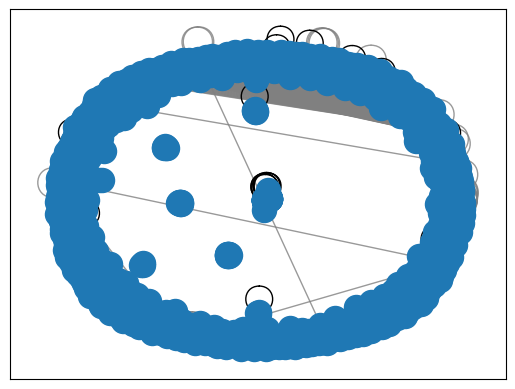

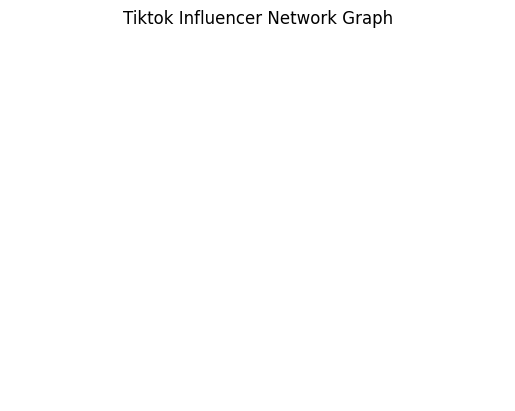

In [ ]:
pos = nx.circular_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx(G, with_labels=False)

# show the plot
plt.show()
# Add title and axis labels
plt.title("Tiktok Influencer Network Graph")
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(20):
      G.add_node(df_tc['Tiktoker_Name'][i])

In [ ]:
for i in range(20):
    for j in range(i+1, 20):
        if df_tc['Tiktok_Name'][i] == df_tc['Tiktok_Name'][j]:
            G.add_edge(df_tc['Tiktoker_Name'][i], df_tc['Tiktoker_Name'][j])


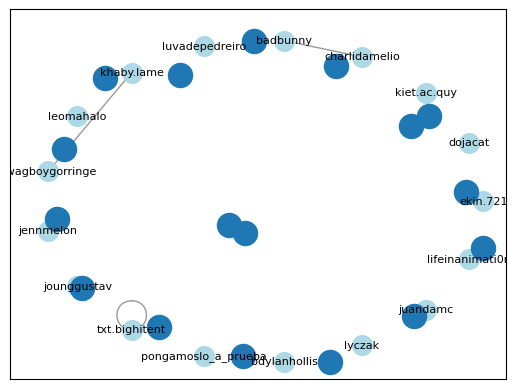

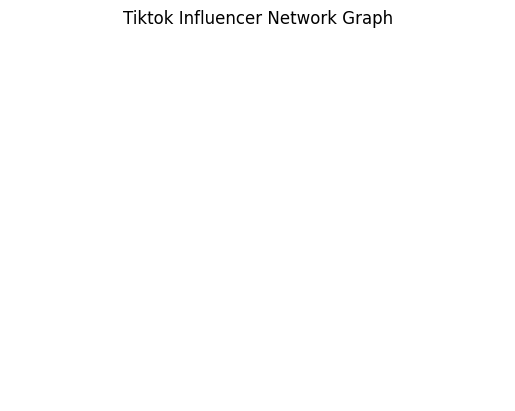

In [ ]:
pos = nx.circular_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx(G, with_labels=False)

# show the plot
plt.show()
# Add title and axis labels
plt.title("Tiktok Influencer Network Graph")
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
from operator import itemgetter 
def convert_value_to_float(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('K'):
            return float(value[:-1]) * 1000
        else:
            return float(value)
    else:
        return float(value)

for i in range(len(df_t)):
    for j in range(i+1, len(df_t)):
        if df_t['Tiktok_Name'][i] != df_t['Tiktok_Name'][j]:
            weight = (convert_value_to_float(df_t['Avg_Views'][i])+convert_value_to_float(df_t['Avg_Views'][j]))/2
            G.add_edge(df_t['Tiktok_Name'][i], df_t['Tiktok_Name'][j], weight=weight)



In [ ]:
import math

def degree_discount(G, k):
    nodes = set(G.nodes())
    scores = dict.fromkeys(nodes, 0)
    for i in range(k):
        max_node = max(scores, key=scores.get)
        nodes.remove(max_node)
        for neighbor in G.neighbors(max_node):
            if neighbor in nodes:
                d = G.degree(neighbor)
                scores[neighbor] += 1 / math.sqrt(d)
    return dict(sorted(scores.items(), key=lambda item: item[1], reverse=True)[:k])


In [ ]:
k=2
seeds = degree_discount(G, k) # select seeds using degree discount heuristic

most_influential_node = max(list(seeds), key=lambda x: G.degree(x))
print("Most influential node:", most_influential_node)


Most influential node: にっしー


In [ ]:
G = nx.DiGraph()

# Add nodes
for name in df_t['Tiktok_Name']:
    G.add_node(name)

# Add edges with weights
for i in range(len(df_t)):
    for j in range(i+1, len(df_t)):
        if df_t['Tiktok_Name'][i] != df_t['Tiktok_Name'][j]:
            weight = (convert_value_to_float(df_t['Avg_Views'][i])+convert_value_to_float(df_t['Avg_Views'][j]))/2
            G.add_edge(df_t['Tiktok_Name'][i], df_t['Tiktok_Name'][j], weight=weight)

# Compute various centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the top 5 nodes for each centrality measure
print("Top 5 nodes by degree centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by betweenness centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by eigenvector centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by degree centrality:
[('Tommy', 1.5102040816326532), ('Tik Toker', 1.4520408163265308), ('Fernanda', 1.35), ('Chloe Cherry', 1.245918367346939), (nan, 1.0836734693877552)]

Top 5 nodes by closeness centrality:
[('Soanh x Diệp 💎', 1.0), ('Armoney', 0.9989795918367347), ('🌠Antonio Tonon🌠', 0.9979591836734694), ('bella', 0.996938775510204), ('nicolebernaal', 0.9959183673469387)]

Top 5 nodes by betweenness centrality:
[('Tommy', 0.2632632215296742), ('Tik Toker', 0.130099435075358), ('Fernanda', 0.123855558566634), ('Chloe Cherry', 0.07379249963519625), (nan, 0.0020251818807196014)]

Top 5 nodes by eigenvector centrality:
[('Soanh x Diệp 💎', 0.12821690087500698), ('Armoney', 0.12715194074475056), ('🌠Antonio Tonon🌠', 0.12609582343766915), ('bella', 0.12504847557313126), ('nicolebernaal', 0.1240098243788952)]


In [ ]:
import numpy as np
import networkx as nx

# Define the propagation model (Independent Cascade Model)
def IC_model(G, seeds, p):
    active_nodes = set(seeds)
    new_active_nodes = set(seeds)
    while new_active_nodes:
        next_nodes = set()
        for node in new_active_nodes:
            for neighbor in G.successors(node):
                if neighbor not in active_nodes:
                    if np.random.random() <= G[node][neighbor]['weight'] * p:
                        next_nodes.add(neighbor)
        new_active_nodes = next_nodes
        active_nodes |= new_active_nodes
    return len(active_nodes)

# Run the simulation for 1000 iterations and calculate the average number of activated nodes
n_iter = 1000
p = 0.2
seeds = ['Solsito.pe', 'benji', 'Lyssa'] # example seed nodes
avg_activated_nodes = 0
for i in range(n_iter):
    activated_nodes = IC_model(G, seeds, p)
    avg_activated_nodes += activated_nodes
avg_activated_nodes /= n_iter

print("Average number of activated nodes:", avg_activated_nodes)


Average number of activated nodes: 943.0


In [ ]:
import random
def independent_cascade_with_time(G, seeds, p):
    # initialize the time dictionary with the seed nodes
    time = {node: 0 for node in seeds}
    # initialize the active nodes set with the seed nodes
    active_nodes = set(seeds)
    # loop until no more nodes can be activated
    while active_nodes:
        # get a random active node
        node = active_nodes.pop()
        # for each neighbor of the active node
        for neighbor in G.neighbors(node):
            # if the neighbor is already active, skip it
            if neighbor in time:
                continue
            # otherwise, try to activate the neighbor with probability p
            if random.random() < p:
                # add the neighbor to the active nodes set
                active_nodes.add(neighbor)
                # record the activation time of the neighbor
                time[neighbor] = time[node] + 1
    # return the time dictionary
    return time


In [ ]:
seeds = ['Soanh x Diệp 💎', 'Armoney', '🌠Antonio Tonon🌠'] 

p = 0.5
time = independent_cascade_with_time(G, seeds, p)
propagation_time = max(time.values())
print("Propagation time:", propagation_time)

Propagation time: 0


In [ ]:
seeds = ['Soanh x Diệp 💎', 'Armoney'] 

p = 0.5
time = independent_cascade_with_time(G, seeds, p)
propagation_time = max(time.values())
print("Propagation time:", propagation_time)

Propagation time: 0


In [ ]:
seeds = ['benji'] 

p = 0.5
time = independent_cascade_with_time(G, seeds, p)
propagation_time = max(time.values())
print("Propagation time:", propagation_time)

Propagation time: 5


In [ ]:
seeds = ['Solsito.pe', 'benji']
p = 0.5
time = independent_cascade_with_time(G, seeds, p)
propagation_time = max(time.values())
print("Propagation time:", propagation_time)

Propagation time: 5


In [ ]:
seeds = ['Armoney', 'Tommy'] 

p = 0.5
time = independent_cascade_with_time(G, seeds, p)
propagation_time = max(time.values())
print("Propagation time:", propagation_time)

Propagation time: 4


In [ ]:
import networkx as nx
import random

def independent_cascade_with_time_and_hop(G, seeds, p):
    # initialize the time and hop dictionaries with the seed nodes
    time = {node: 0 for node in seeds}
    hop = {node: 0 for node in seeds}
    # initialize the active nodes set with the seed nodes
    active_nodes = set(seeds)
    # loop until no more nodes can be activated
    while active_nodes:
        # get a random active node
        node = active_nodes.pop()
        # for each neighbor of the active node
        for neighbor in G.neighbors(node):
            # if the neighbor is already active, skip it
            if neighbor in time:
                continue
            # otherwise, try to activate the neighbor with probability p
            if random.random() < p:
                # add the neighbor to the active nodes set
                active_nodes.add(neighbor)
                # record the activation time and hop distance of the neighbor
                time[neighbor] = time[node] + 1
                hop[neighbor] = hop[node] + 1
            else:
                # if the neighbor is not activated, update the hop distance if it is smaller than the current value
                if neighbor in hop:
                    hop[neighbor] = min(hop[neighbor], hop[node] + 1)
                else:
                    hop[neighbor] = hop[node] + 1
    # return the time and hop dictionaries
    return time, hop


In [ ]:
seeds = ['Armoney', 'Tommy'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 4
Minimum hop distance: 4


In [ ]:
seeds = ['Soanh x Diệp 💎', 'Armoney'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 0
Minimum hop distance: 0


In [ ]:
seeds = ['benji'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 6
Minimum hop distance: 6


In [ ]:
import networkx as nx
import random

def independent_cascade_with_time_hop_and_size(G, seeds, p):
    # initialize the time, hop, and activated nodes sets with the seed nodes
    time = {node: 0 for node in seeds}
    hop = {node: 0 for node in seeds}
    activated_nodes = set(seeds)
    # initialize the active nodes set with the seed nodes
    active_nodes = set(seeds)
    # loop until no more nodes can be activated
    while active_nodes:
        # get a random active node
        node = active_nodes.pop()
        # for each neighbor of the active node
        for neighbor in G.neighbors(node):
            # if the neighbor is already active, skip it
            if neighbor in activated_nodes:
                continue
            # otherwise, try to activate the neighbor with probability p
            if random.random() < p:
                # add the neighbor to the active and activated nodes sets
                active_nodes.add(neighbor)
                activated_nodes.add(neighbor)
                # record the activation time and hop distance of the neighbor
                time[neighbor] = time[node] + 1
                hop[neighbor] = hop[node] + 1
            else:
                # if the neighbor is not activated, update the hop distance if it is smaller than the current value
                if neighbor in hop:
                    hop[neighbor] = min(hop[neighbor], hop[node] + 1)
                else:
                    hop[neighbor] = hop[node] + 1
    # return the time, hop, and activated nodes sets, as well as the size of the activated nodes set
    return time, hop, activated_nodes, len(activated_nodes)


In [ ]:
p = 0.5
seeds = ['Armoney', 'Tommy'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 4
Minimum hop distance: 4
Number of activated nodes: 943


In [ ]:
p = 0.5
seeds = ['benji'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 5
Minimum hop distance: 5
Number of activated nodes: 942


In [ ]:
p = 0.5
seeds = ['Tommy'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 5
Minimum hop distance: 5
Number of activated nodes: 943


In [ ]:
p = 0.5
seeds = ['Fernanda'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 3
Minimum hop distance: 3
Number of activated nodes: 941


In [ ]:
p = 0.5
seeds = ['Armoney', 'Tommy'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 5
Minimum hop distance: 5
Number of activated nodes: 942


In [ ]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [ ]:
#Just TO change to actual numbers rather than K or M
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df
    

In [ ]:
change(df_t,['Subscribers_Count'])

,Tiktoker_Name,Tiktok_Name,Subscribers_Count,Avg_Views,Avg_Likes,Avg_Comments,Avg_Shares,newSubscribers_Count
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K,221700.0
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K,22200000.0
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K,2100000.0
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K,135400000.0
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K,11400000.0
...,...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195,4000000.0
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145,5100000.0
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K,5800000.0
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630,1200000.0


# TOP 10 most followed celebrity on Tiktok

In [ ]:
df_t.sort_values(by='Subscribers_Count',ascending=False,ignore_index=True).iloc[0:10,[1,2]]

,Tiktok_Name,Subscribers_Count
0,Dove Cameron,9M
1,Magic Daniell,9M
2,Piperrockelle,9M
3,Stardust Crusader,99K
4,Paula Verhoeven,997.5K
5,【コムドット】 ひゅうが,995.5K
6,startup.mp4,98K
7,DjMaRiiO,983.8K
8,Alejandro,983.5K
9,YaziDoe,958.9K


# Youtube data set analysis

In [ ]:
df_y.head(3)

,Youtuber_Name,Channel_Name,Category,Subscribers_Count,Audience_Country,Avg_Views,Avg_Likes,Avg_Comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21


In [ ]:
df_y.isnull().sum()

Youtuber_Name          0
Channel_Name           0
Category             277
Subscribers_Count      0
Audience_Country     161
Avg_Views              0
Avg_Likes             38
Avg_Comments         209
dtype: int64

In [ ]:
df_y['Subscribers_Count'].str[-1].value_counts()

M    1000
Name: Subscribers_Count, dtype: int64

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(len(df_yc)):
    G.add_node(df_yc['Youtuber_Name'][i])

In [ ]:
for i in range(len(df_yc)):
    for j in range(i+1, len(df_yc)):
        if df_yc['Channel_Name'][i] == df_yc['Channel_Name'][j]:
            G.add_edge(df_yc['Youtuber_Name'][i], df_yc['Youtuber_Name'][j])


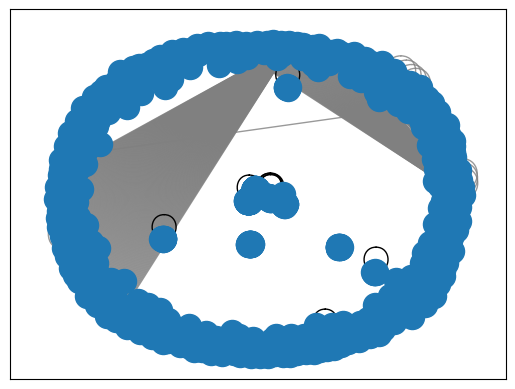

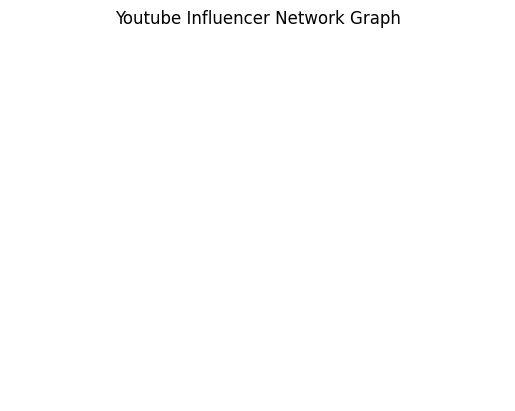

In [ ]:
pos = nx.circular_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx(G, with_labels=False)

# show the plot
plt.show()
# Add title and axis labels
plt.title("Youtube Influencer Network Graph")
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(500):
      G.add_node(df_yc['Youtuber_Name'][i])

In [ ]:
for i in range(500):
    for j in range(i+1, 500):
        if df_yc['Channel_Name'][i] == df_yc['Channel_Name'][j]:
            G.add_edge(df_yc['Youtuber_Name'][i], df_yc['Youtuber_Name'][j])


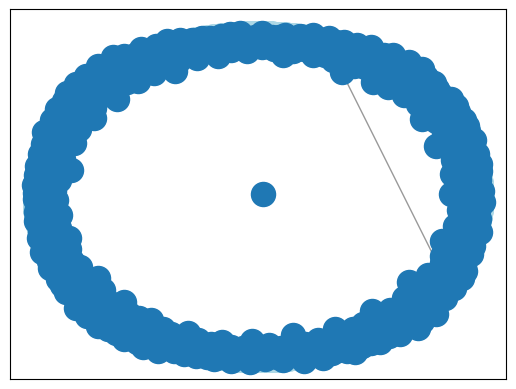

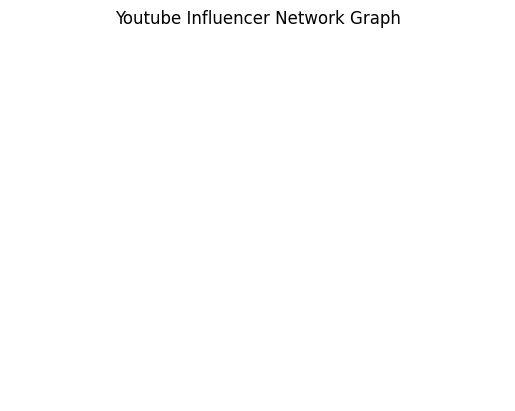

In [ ]:
pos = nx.circular_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx(G, with_labels=False)

# show the plot
plt.show()
# Add title and axis labels
plt.title("Youtube Influencer Network Graph")
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
from operator import itemgetter 
def convert_value_to_float(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('K'):
            return float(value[:-1]) * 1000
        else:
            return float(value)
    else:
        return float(value)

for i in range(len(df_y)):
    for j in range(i+1, len(df_y)):
        if df_y['Channel_Name'][i] != df_y['Channel_Name'][j]:
            weight = (convert_value_to_float(df_y['Avg_Views'][i])+convert_value_to_float(df_y['Avg_Views'][j]))/2
            G.add_edge(df_y['Channel_Name'][i], df_y['Channel_Name'][j], weight=weight)



In [ ]:
import math

def degree_discount(G, k):
    nodes = set(G.nodes())
    scores = dict.fromkeys(nodes, 0)
    for i in range(k):
        max_node = max(scores, key=scores.get)
        nodes.remove(max_node)
        for neighbor in G.neighbors(max_node):
            if neighbor in nodes:
                d = G.degree(neighbor)
                scores[neighbor] += 1 / math.sqrt(d)
    return dict(sorted(scores.items(), key=lambda item: item[1], reverse=True)[:k])


In [ ]:
k=2
seeds = degree_discount(G, k) # select seeds using degree discount heuristic

most_influential_node = max(list(seeds), key=lambda x: G.degree(x))
print("Most influential node:", most_influential_node)


Most influential node: LEGENDA FUNK


In [ ]:
G = nx.DiGraph()

# Add nodes
for name in df_y['Channel_Name']:
    G.add_node(name)

# Add edges with weights
for i in range(len(df_y)):
    for j in range(i+1, len(df_y)):
        if df_y['Channel_Name'][i] != df_y['Channel_Name'][j]:
            weight = (convert_value_to_float(df_y['Avg_Views'][i])+convert_value_to_float(df_y['Avg_Views'][j]))/2
            G.add_edge(df_y['Channel_Name'][i], df_y['Channel_Name'][j], weight=weight)

# Compute various centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the top 5 nodes for each centrality measure
print("Top 5 nodes by degree centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by betweenness centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by eigenvector centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by degree centrality:
[('Bollywood Classics', 1.3540621865596791), ('Rajshri', 1.0010030090270812), ('HAR PAL GEO', 1.0010030090270812), ('DisneyMusicVEVO', 1.0010030090270812), ('Ultra Music', 1.0010030090270812)]

Top 5 nodes by closeness centrality:
[('BRKsEDU', 1.0), ('ICC', 0.9989969909729187), ('CinemaSins', 0.9979939819458375), ('EL GATO', 0.9969909729187563), ('FutParódias', 0.995987963891675)]

Top 5 nodes by betweenness centrality:
[('Bollywood Classics', 0.06256520565713204), ('T-Series', 0.0), ('Cocomelon - Nursery Rhymes', 0.0), ('SET India', 0.0), ('PewDiePie', 0.0)]

Top 5 nodes by eigenvector centrality:
[('BRKsEDU', 0.1567796437456394), ('ICC', 0.154840988137216), ('CinemaSins', 0.1529262996662985), ('EL GATO', 0.15103528215333403), ('FutParódias', 0.1491676430760559)]


In [ ]:
import numpy as np
import networkx as nx

# Define the propagation model (Independent Cascade Model)
def IC_model(G, seeds, p):
    active_nodes = set(seeds)
    new_active_nodes = set(seeds)
    while new_active_nodes:
        next_nodes = set()
        for node in new_active_nodes:
            if G.is_directed():
                neighbors = G.successors(node)
            else:
                neighbors = G.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in active_nodes:
                    if np.random.random() <= G[node][neighbor]['weight'] * p:
                        next_nodes.add(neighbor)
        new_active_nodes = next_nodes
        active_nodes |= new_active_nodes
    return len(active_nodes)

# Run the simulation for 1000 iterations and calculate the average number of activated nodes
n_iter = 1000
p = 0.2
seeds = ['Bollywood Classics', 'ICC'] # example seed nodes
avg_activated_nodes = 0
for i in range(n_iter):
    activated_nodes = IC_model(G, seeds, p)
    avg_activated_nodes += activated_nodes
avg_activated_nodes /= n_iter

print("Average number of activated nodes:", avg_activated_nodes)


Average number of activated nodes: 897.0


In [ ]:
import networkx as nx
import random

def independent_cascade_with_time_hop_and_size(G, seeds, p):
    # initialize the time, hop, and activated nodes sets with the seed nodes
    time = {node: 0 for node in seeds}
    hop = {node: 0 for node in seeds}
    activated_nodes = set(seeds)
    # initialize the active nodes set with the seed nodes
    active_nodes = set(seeds)
    # loop until no more nodes can be activated
    while active_nodes:
        # get a random active node
        node = active_nodes.pop()
        # for each neighbor of the active node
        for neighbor in G.neighbors(node):
            # if the neighbor is already active, skip it
            if neighbor in activated_nodes:
                continue
            # otherwise, try to activate the neighbor with probability p
            if random.random() < p:
                # add the neighbor to the active and activated nodes sets
                active_nodes.add(neighbor)
                activated_nodes.add(neighbor)
                # record the activation time and hop distance of the neighbor
                time[neighbor] = time[node] + 1
                hop[neighbor] = hop[node] + 1
            else:
                # if the neighbor is not activated, update the hop distance if it is smaller than the current value
                if neighbor in hop:
                    hop[neighbor] = min(hop[neighbor], hop[node] + 1)
                else:
                    hop[neighbor] = hop[node] + 1
    # return the time, hop, and activated nodes sets, as well as the size of the activated nodes set
    return time, hop, activated_nodes, len(activated_nodes)


In [ ]:
seeds = ['BRKsEDU'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 0
Minimum hop distance: 0


In [ ]:
seeds = ['ICC'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 1
Minimum hop distance: 1


In [ ]:
seeds = ['Bollywood Classics'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 3
Minimum hop distance: 3


In [ ]:
p = 0.5
seeds = ['BRKsEDU'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 0
Minimum hop distance: 0
Number of activated nodes: 1


In [ ]:
p = 0.5
seeds = ['ICC'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 1
Minimum hop distance: 1
Number of activated nodes: 2


In [ ]:
p = 0.5
seeds = ['Bollywood Classics'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 3
Minimum hop distance: 3
Number of activated nodes: 897


In [ ]:
p = 0.5
seeds = ['BRKsEDU', 'Bollywood Classics'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 4
Minimum hop distance: 4
Number of activated nodes: 894


In [ ]:
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)

df_y.rename({'Subscribers':'Followers',},axis=1,inplace=True)

# Instagram data set analysis

> Indented block



In [ ]:
df_i.head(3)

,Influencer_Insta_Name,Influencer_Name,Category_1,Category_2,Followers_Count,Audience_Country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K


In [ ]:
df_i.isnull().sum()

Influencer_Insta_Name         0
Influencer_Name              21
Category_1                  108
Category_2                  713
Followers_Count               0
Audience_Country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [ ]:
df_i['Followers_Count'].str[-1].value_counts()

M    1000
Name: Followers_Count, dtype: int64

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(len(df_ic)):
    G.add_node(df_ic['Influencer_Insta_Name'][i])

In [ ]:
for i in range(len(df_ic)):
    for j in range(i+1, len(df_ic)):
        if df_ic['Influencer_Insta_Name'][i] == df_ic['Influencer_Insta_Name'][j]:
            G.add_edge(df_ic['Influencer_Name'][i], df_ic['Influencer_Name'][j])


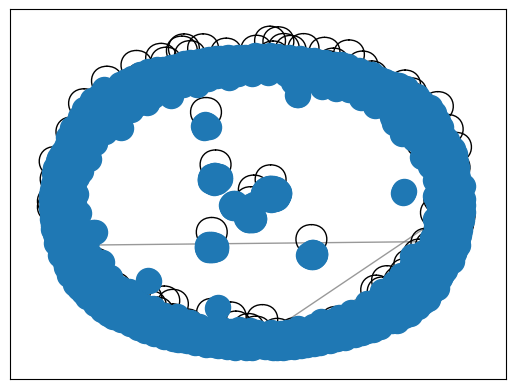

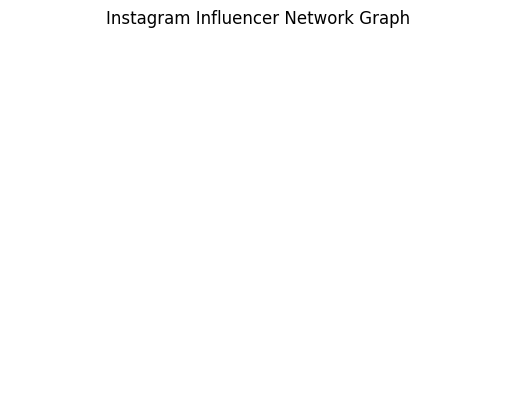

In [ ]:
pos = nx.circular_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx(G, with_labels=False)

# show the plot
plt.show()
# Add title and axis labels
plt.title("Instagram Influencer Network Graph")
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(1000):
      G.add_node(df_ic['Influencer_Name'][i])

In [ ]:
for i in range(1000):
    for j in range(i+1, 1000):
        if df_ic['Influencer_Insta_Name'][i] == df_ic['Influencer_Insta_Name'][j]:
            G.add_edge(df_ic['Influencer_Name'][i], df_ic['Influencer_Name'][j])


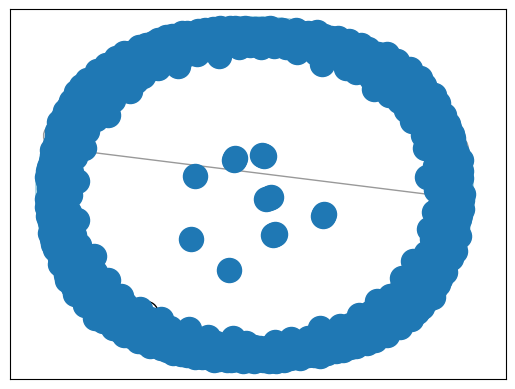

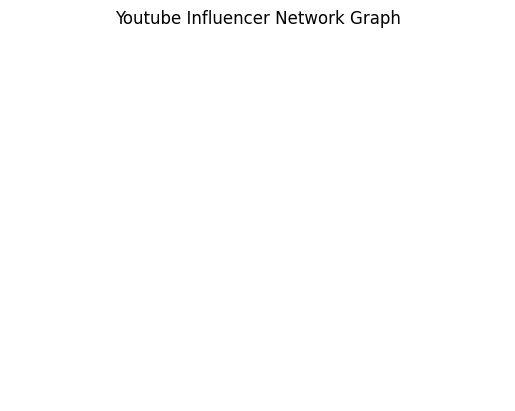

In [ ]:
pos = nx.circular_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx(G, with_labels=False)

# show the plot
plt.show()
# Add title and axis labels
plt.title("Youtube Influencer Network Graph")
plt.axis('off')

# Show the graph
plt.show()

In [ ]:
from operator import itemgetter 
def convert_value_to_float(value):
    if isinstance(value, str):
        if value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('K'):
            return float(value[:-1]) * 1000
        else:
            return float(value)
    else:
        return float(value)

for i in range(len(df_i)):
    for j in range(i+1, len(df_i)):
        if df_i['Influencer_Insta_Name'][i] != df_i['Influencer_Insta_Name'][j]:
            weight = (convert_value_to_float(df_i['Authentic engagement\r\n'][i])+convert_value_to_float(df_i['Authentic engagement\r\n'][j]))/2
            G.add_edge(df_i['Influencer_Insta_Name'][i], df_i['Influencer_Insta_Name'][j], weight=weight)



In [ ]:
import math

def degree_discount(G, k):
    nodes = set(G.nodes())
    scores = dict.fromkeys(nodes, 0)
    for i in range(k):
        max_node = max(scores, key=scores.get)
        nodes.remove(max_node)
        for neighbor in G.neighbors(max_node):
            if neighbor in nodes:
                d = G.degree(neighbor)
                scores[neighbor] += 1 / math.sqrt(d)
    return dict(sorted(scores.items(), key=lambda item: item[1], reverse=True)[:k])


In [ ]:
k=2
seeds = degree_discount(G, k) # select seeds using degree discount heuristic

most_influential_node = max(list(seeds), key=lambda x: G.degree(x))
print("Most influential node:", most_influential_node)


Most influential node: thebursin


In [ ]:
G = nx.DiGraph()

# Add nodes
for name in df_i['Influencer_Insta_Name']:
    G.add_node(name)

# Add edges with weights
for i in range(len(df_i)):
    for j in range(i+1, len(df_i)):
        if df_i['Influencer_Insta_Name'][i] != df_i['Influencer_Insta_Name'][j]:
            weight = (convert_value_to_float(df_i['Authentic engagement\r\n'][i])+convert_value_to_float(df_i['Authentic engagement\r\n'][j]))/2
            G.add_edge(df_i['Influencer_Insta_Name'][i], df_i['Influencer_Insta_Name'][j], weight=weight)



In [ ]:
# Compute various centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print the top 5 nodes for each centrality measure
print("Top 5 nodes by degree centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nTop 5 nodes by betweenness centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by degree centrality:
[('433', 0.9999999999999999), ('__youngbae__', 0.9999999999999999), ('_agentgirl_', 0.9999999999999999), ('_imyour_joy', 0.9999999999999999), ('_jeongjaehyun', 0.9999999999999999)]

Top 5 nodes by closeness centrality:
[('zoesugg', 1.0), ('zoeisabellakravitz', 0.998995983935743), ('zkdlin', 0.9979919678714859), ('zidane', 0.9969879518072289), ('zendaya', 0.9959839357429718)]

Top 5 nodes by betweenness centrality:
[('433', 0.0), ('__youngbae__', 0.0), ('_agentgirl_', 0.0), ('_imyour_joy', 0.0), ('_jeongjaehyun', 0.0)]


In [ ]:
import numpy as np
import networkx as nx

# Define the propagation model (Independent Cascade Model)
def IC_model(G, seeds, p):
    active_nodes = set(seeds)
    new_active_nodes = set(seeds)
    while new_active_nodes:
        next_nodes = set()
        for node in new_active_nodes:
            if G.is_directed():
                neighbors = G.successors(node)
            else:
                neighbors = G.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in active_nodes:
                    if np.random.random() <= G[node][neighbor]['weight'] * p:
                        next_nodes.add(neighbor)
        new_active_nodes = next_nodes
        active_nodes |= new_active_nodes
    return len(active_nodes)

# Run the simulation for 1000 iterations and calculate the average number of activated nodes
n_iter = 1000
p = 0.2
seeds = ['__youngbae__', 'zoeisabellakravitz'] # example seed nodes
avg_activated_nodes = 0
for i in range(n_iter):
    activated_nodes = IC_model(G, seeds, p)
    avg_activated_nodes += activated_nodes
avg_activated_nodes /= n_iter

print("Average number of activated nodes:", avg_activated_nodes)


Average number of activated nodes: 996.0


In [ ]:
import networkx as nx
import random

def independent_cascade_with_time_hop_and_size(G, seeds, p):
    # initialize the time, hop, and activated nodes sets with the seed nodes
    time = {node: 0 for node in seeds}
    hop = {node: 0 for node in seeds}
    activated_nodes = set(seeds)
    # initialize the active nodes set with the seed nodes
    active_nodes = set(seeds)
    # loop until no more nodes can be activated
    while active_nodes:
        # get a random active node
        node = active_nodes.pop()
        # for each neighbor of the active node
        for neighbor in G.neighbors(node):
            # if the neighbor is already active, skip it
            if neighbor in activated_nodes:
                continue
            # otherwise, try to activate the neighbor with probability p
            if random.random() < p:
                # add the neighbor to the active and activated nodes sets
                active_nodes.add(neighbor)
                activated_nodes.add(neighbor)
                # record the activation time and hop distance of the neighbor
                time[neighbor] = time[node] + 1
                hop[neighbor] = hop[node] + 1
            else:
                # if the neighbor is not activated, update the hop distance if it is smaller than the current value
                if neighbor in hop:
                    hop[neighbor] = min(hop[neighbor], hop[node] + 1)
                else:
                    hop[neighbor] = hop[node] + 1
    # return the time, hop, and activated nodes sets, as well as the size of the activated nodes set
    return time, hop, activated_nodes, len(activated_nodes)


In [ ]:
seeds = ['zoesugg'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 0
Minimum hop distance: 0


In [ ]:
seeds = ['__youngbae__'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 3
Minimum hop distance: 3


In [ ]:
seeds = ['433'] 
p = 0.5
time, hop = independent_cascade_with_time_and_hop(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)

Propagation time: 4
Minimum hop distance: 4


In [ ]:
p = 0.5
seeds = ['__youngbae__'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 4
Minimum hop distance: 4
Number of activated nodes: 993


In [ ]:
p = 0.5
seeds = ['__youngbae__'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 4
Minimum hop distance: 4
Number of activated nodes: 994


In [ ]:
p = 0.5
seeds = ['__youngbae__', 'zoeisabellakravitz'] 

time, hop, activated_nodes, num_activated_nodes = independent_cascade_with_time_hop_and_size(G, seeds, p)
propagation_time = max(time.values())
min_hop_distance = max(hop.values())
print("Propagation time:", propagation_time)
print("Minimum hop distance:", min_hop_distance)
print("Number of activated nodes:", num_activated_nodes)

Propagation time: 4
Minimum hop distance: 4
Number of activated nodes: 996


In [ ]:
df_i.drop(labels=['Influencer_Insta_Name','Authentic engagement\r\n'],axis=1,inplace=True)

In [ ]:
df_i.head(2)

,Influencer_Name,Category_1,Category_2,Followers_Count,Audience_Country(mostly),Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K


In [ ]:
li=['Followers_Count','Engagement avg\r\n']


In [ ]:
change(df_i,li)

,Influencer_Name,Category_1,Category_2,Followers_Count,Audience_Country(mostly),Engagement avg\r\n,newFollowers_Count,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,885.5K,8200000.0,885500.0


In [ ]:
df_i.head()

,Influencer_Name,Category_1,Category_2,Followers_Count,Audience_Country(mostly),Engagement avg\r\n,newFollowers_Count,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0


##### Engagement Rate formula:
    ER=(Engagement Average/total Followers)*100

In [ ]:
df_i['Engagement Rate']=np.round((df_i['newEngagement avg\r\n']/df_i['newFollowers_Count'])*100,3)

In [ ]:
print(df_i['Followers_Count'].str[-1].unique())

['M']


In [ ]:
# for convenice 
df_i['newFollowers_Count']=df_i['newFollowers_Count']/1000000

In [ ]:
df_i.drop(labels=['Engagement avg\r\n','newEngagement avg\r\n'],axis=1,inplace=True)

In [ ]:
df_i.head(5)

,Influencer_Name,Category_1,Category_2,Followers_Count,Audience_Country(mostly),newFollowers_Count,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,NaN,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,NaN,11.1M,Indonesia,11.1,27.928


# TOP 15 most followed celebrity on  instagram

In [ ]:
df_i.sort_values(by='newFollowers_Count',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

,Influencer_Name,Category_1,Followers_Count,Engagement Rate
0,Instagram,Photography,487.2M,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,1.668
2,Kylie 🤍,Fashion,323.3M,3.805
3,Leo Messi,Sports with a ball,315.4M,1.680
4,Selena Gomez,Music,308.2M,1.428
5,therock,Cinema & Actors/actresses,307M,0.129
6,Ariana Grande,Music,302.3M,1.356
7,Kim Kardashian,Fashion,296.4M,0.978
8,Beyoncé,Music,246.9M,1.499
9,Khloé Kardashian,Clothing & Outfits,230.2M,0.521


<Axes: title={'center': 'Top 15 most followed celebrity on instagram'}, xlabel='newFollowers_Count', ylabel='Influencer_Name'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


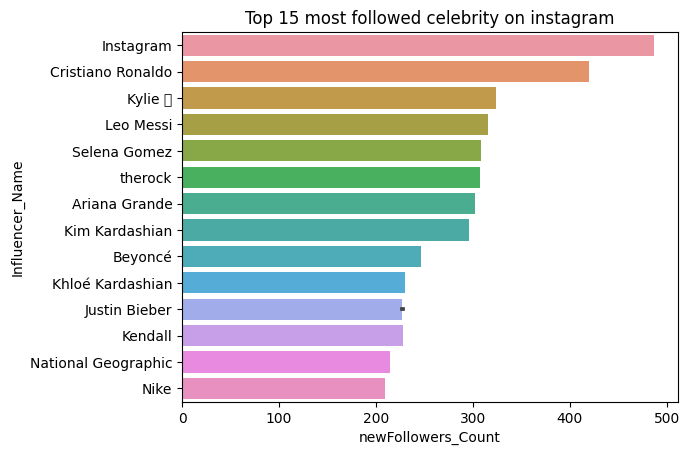

In [ ]:
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='Influencer_Name',x='newFollowers_Count',data=df_i.sort_values(by='newFollowers_Count',ascending=False).head(15))

In [ ]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [ ]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category_1'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

## TOP  categories followed on instagram(POPULAR CATEGORIES  ON INSTAGRAM)

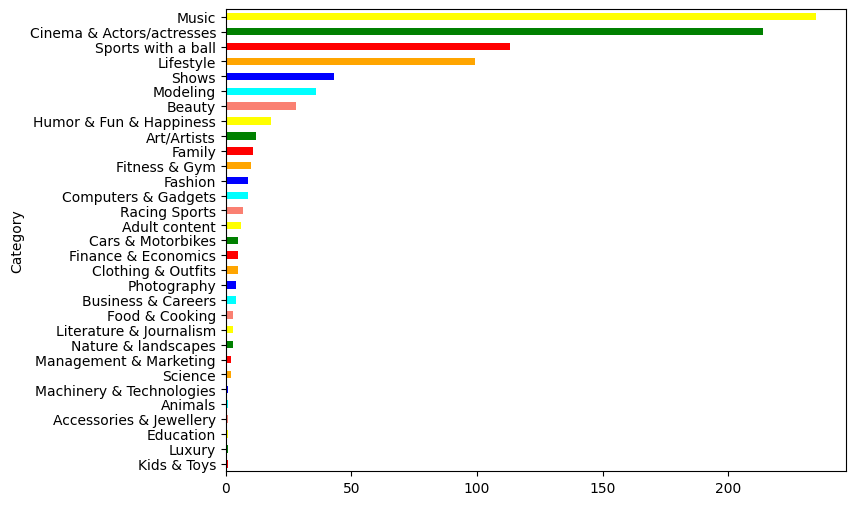

In [ ]:
plot(df_i)
    

## TOP  categories followed on YOUTUBE(POPULAR CATEGORIES  ON YOUTUBE)

In [ ]:
df_y.drop_duplicates(subset=['Channel_Name'],inplace=True)

In [ ]:
def plot_y(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

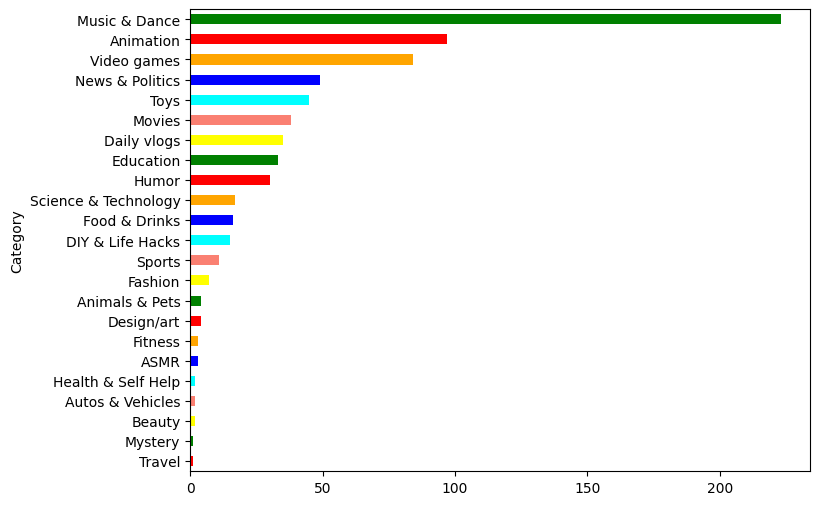

In [ ]:
plot_y(df_y)

# Decide That where you want to make ads

In [ ]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

# (TARGET COUNTRY FOR BUISNESS)Checking the demand for categories by Country wise

### for understanding that where is the demand of product

In [ ]:
def demand(data,category):
    return data[data['Category']==category]['Audience_Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)
    


<Axes: >

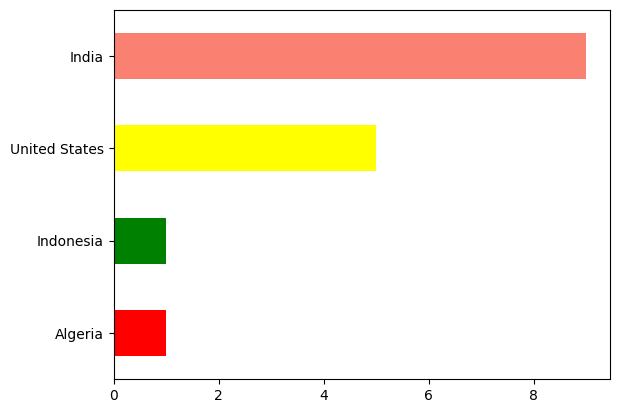

In [ ]:
demand(df_y,'Education')

## 1-for a particular category we can choose the country where a huge audience is liking that particular category .
### for example if you want to make an advertisement of educational app then you can choose India

# TOP 15 most followed channels on  youtube

In [ ]:
df_y.iloc[0:10,[1,2,3]]
# youtube dataset is already sorted

,Channel_Name,Category,Subscribers_Count
0,T-Series,Music & Dance,212.1M
1,Cocomelon - Nursery Rhymes,Education,132.1M
2,SET India,NaN,130.4M
3,PewDiePie,Animation,111.4M
4,MrBeast,Video games,92.5M
5,✿ Kids Diana Show,Animation,92.4M
6,Like Nastya,Animation,90.1M
7,WWE,Video games,86.9M
8,Zee Music Company,Music & Dance,82.7M
9,Vlad and Niki,Toys,80.4M


In [ ]:
ly=['Followers','avg views', 'avg likes', 'avg comments']

### if you want to go with mini followers for advertisement on instagram

In [ ]:
df_i['newFollowers_Count'].describe()

count    1000.000000
mean       25.716200
std        41.029031
min         2.600000
25%         9.000000
50%        14.550000
75%        26.525000
max       487.200000
Name: newFollowers_Count, dtype: float64

In [ ]:
df_i['newFollowers_Count'].quantile(0.94)

61.705999999999996

#### I am taking 60M as a threshold means for instagram celebrity havning above 60M followers are considerd to be mega celebrity

In [ ]:
df_i.head(2)

,Influencer_Name,Category_1,Category_2,Followers_Count,Audience_Country(mostly),newFollowers_Count,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270


## if you  want to make ads by mini influencers 

In [ ]:
def for_mini_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience_Country(mostly)']==coun]
    df1_mini=df1[df1['newFollowers_Count']<60]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category_1').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [ ]:
for_mini_followers_instagram('India','Music')

,Influencer_Name,Followers_Count,Engagement Rate
705,Olivia Rodrigo,22.9M,15.284
992,Zayn Malik,44.9M,12.918
242,djsnake,9.1M,4.721
118,Bebe Rexha,10.8M,3.028
876,Tamannaah Bhatia,15.9M,2.528
216,Darshan Raval #Goriye,14.8M,1.683
604,marshmello,29.2M,1.392
581,Madhuri Dixit,30.6M,1.121
824,shreyaghoshal,23.7M,0.601
333,Guru Randhawa,31.5M,0.430


## if you want to make ads by mega influencers

In [ ]:
def for_mega_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience_Country(mostly)']==coun]
    df1_mini=df1[df1['newFollowers_Count']>60]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category_1').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [ ]:
for_mega_followers_instagram('India','Music')

,Influencer_Name,Followers_Count,Engagement Rate
818,Shakira,71.9M,1.317
670,Neha Kakkar (Mrs. Singh),68.5M,1.131
458,Justin Bieber,227M,0.281
459,Justin Bieber,227.4M,0.196


In [ ]:
for_mini_followers_instagram('India','Beauty')

,Influencer_Name,Followers_Count,Engagement Rate
883,Tejasswi Prakash,5.5M,9.335
757,Rashmika Mandanna,30M,6.667
803,Samantha,22.9M,3.063
865,Sunny Leone,51.5M,0.819


In [ ]:
for_mini_followers_instagram('India','Shows')

,Influencer_Name,Followers_Count,Engagement Rate
786,𝐑𝐨𝐡𝐢𝐭 𝐙𝐢𝐧𝐣𝐮𝐫𝐤𝐞 ~ 𝐫𝐞𝐚𝐜𝐭𝐢𝐨𝐧𝐛𝐨𝐢 💫,21.2M,5.189
73,ANNE-MARIE,9.2M,3.691
108,Awez Darbar,17.8M,3.137
239,Divyanka Tripathi Dahiya,18.9M,0.890


In [ ]:
 for_mini_followers_instagram('India','Sports with a ball')

,Influencer_Name,Followers_Count,Engagement Rate
653,Nani,4.8M,11.646
836,Smriti Mandhana,5.9M,10.808
825,Shreyas Iyer,5.9M,9.758
774,Rishabh Pant,6.1M,9.666
752,KL Rahul👑,11.9M,6.626
343,Hardik Himanshu Pandya,20.6M,5.340
785,Rohit Sharma,23.3M,5.150
15,AB de Villiers,17.2M,3.581
222,David Warner,9.1M,3.074
822,Shikhar Dhawan,10.8M,2.763


In [ ]:
for_mega_followers_instagram('India','Sports with a ball')

,Influencer_Name,Followers_Count,Engagement Rate
943,Virat Kohli,188.1M,1.808
203,Cristiano Ronaldo,419.6M,1.668


In [ ]:
df_y.head(3)

,Youtuber_Name,Channel_Name,Category,Subscribers_Count,Audience_Country,Avg_Views,Avg_Likes,Avg_Comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21


In [ ]:
df_y.isnull().sum()

Youtuber_Name          0
Channel_Name           0
Category             276
Subscribers_Count      0
Audience_Country     161
Avg_Views              0
Avg_Likes             38
Avg_Comments         209
dtype: int64

#### Due to nan values we have to remove some data but, in reality you can collect this data easily

In [ ]:
df_y.dropna(axis=0,how='any',subset=['Avg_Likes','Avg_Comments']).isnull().sum()

Youtuber_Name          0
Channel_Name           0
Category             215
Subscribers_Count      0
Audience_Country       0
Avg_Views              0
Avg_Likes              0
Avg_Comments           0
dtype: int64

In [ ]:
df_y.dropna(axis=0,how='any',subset=['Avg_Likes','Avg_Comments'],inplace=True)

In [ ]:
ly=['Subscribers_Count','Avg_Views', 'Avg_Likes', 'Avg_Comments']

In [ ]:
change(df_y,ly)

,Youtuber_Name,Channel_Name,Category,Subscribers_Count,Audience_Country,Avg_Views,Avg_Likes,Avg_Comments,newSubscribers_Count,newAvg_Views,newAvg_Likes,newAvg_Comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000.0,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000.0,30600000.0,1700000.0,67700.0
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000.0,76600.0,2800.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K,9200000.0,1400000.0,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636,9200000.0,243800.0,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874,9200000.0,296000.0,10200.0,874.0
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58,9200000.0,15200.0,854.0,58.0


In [ ]:
df_y[df_y['Audience_Country']=='Spain']['Category'].value_counts()

Video games         2
Animation           1
DIY & Life Hacks    1
Name: Category, dtype: int64

In [ ]:
df_y[df_y['Audience_Country']=='Brazil'].groupby('Category').get_group('Animation')

,Youtuber_Name,Channel_Name,Category,Subscribers_Count,Audience_Country,Avg_Views,Avg_Likes,Avg_Comments,newSubscribers_Count,newAvg_Views,newAvg_Likes,newAvg_Comments
249,RobinHoodGamer1,Robin Hood Gamer,Animation,18.4M,Brazil,1.3M,59K,1.1K,18400000.0,1300000.0,59000.0,1100.0
265,INCRÍVEL,INCRÍVEL,Animation,17.8M,Brazil,32.5K,1.8K,47,17800000.0,32500.0,1800.0,47.0
493,TazerCraft,TazerCraft,Animation,13.3M,Brazil,352.8K,26.8K,532,13300000.0,352800.0,26800.0,532.0
584,jazzghost1,Jazzghost,Animation,12.3M,Brazil,758.7K,55.9K,2K,12300000.0,758700.0,55900.0,2000.0
672,FelipeViktor,LipaoGamer,Animation,11.3M,Brazil,164.5K,12.4K,168,11300000.0,164500.0,12400.0,168.0
945,BETO GAMER,BETO GAMER,Animation,9.5M,Brazil,448.9K,28.1K,372,9500000.0,448900.0,28100.0,372.0
999,BRKsEDU,BRKsEDU,Animation,9.2M,Brazil,112.3K,9.8K,246,9200000.0,112300.0,9800.0,246.0


In [ ]:
df_y['Engagement rate']=round(((df_y['newAvg_Comments']+df_y['newAvg_Likes']+df_y['newAvg_Views'])/df_y['newSubscribers_Count'])*100,3)

In [ ]:
df_y.head(2)

,Youtuber_Name,Channel_Name,Category,Subscribers_Count,Audience_Country,Avg_Views,Avg_Likes,Avg_Comments,newSubscribers_Count,newAvg_Views,newAvg_Likes,newAvg_Comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0,0.157
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0,0.018


In [ ]:
df_y.columns

Index(['Youtuber_Name', 'Channel_Name', 'Category', 'Subscribers_Count',
       'Audience_Country', 'Avg_Views', 'Avg_Likes', 'Avg_Comments',
       'newSubscribers_Count', 'newAvg_Views', 'newAvg_Likes',
       'newAvg_Comments', 'Engagement rate'],
      dtype='object')

In [ ]:
# for convenince
df_y['newSubscribers_Count']=df_y['newSubscribers_Count']/1000000

In [ ]:
df_y.drop(labels=['newAvg_Views', 'newAvg_Likes', 'Avg_Comments','newAvg_Comments', 'newAvg_Likes', 'Avg_Likes',
       ],axis=1,inplace=True)

In [ ]:
df_y['newSubscribers_Count'].describe()

count    786.000000
mean      17.016921
std       13.593720
min        9.200000
25%       10.700000
50%       13.000000
75%       17.600000
max      212.100000
Name: newSubscribers_Count, dtype: float64

In [ ]:
df_y['newSubscribers_Count'].quantile(0.90)

28.25

### Threshold can be decided by your choice 
#### Here i am cosidering that who have >30M subscribers that is coming the category of mega celebrity

In [ ]:
df_y.head(1)

,Youtuber_Name,Channel_Name,Category,Subscribers_Count,Audience_Country,Avg_Views,newSubscribers_Count,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,212.1,0.157


In [ ]:
def for_mini_followers_youtube(coun,cat):
    df1=df_y[df_y['Audience_Country']==coun]
    df1_mini=df1[df1['newSubscribers_Count']<=30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [ ]:
for_mini_followers_youtube('United States','Music & Dance')

,Youtuber_Name,Subscribers_Count,Engagement rate
860,Juice WRLD,10M,79.277
914,Prince Royce,9.6M,74.629
717,YoungBoy Never Broke Again,10.9M,72.458
861,jordanmatter,10M,50.495
607,Migosatl,11.9M,28.876
625,AvrilLavigne,11.7M,25.102
656,Davie504,11.5M,19.094
711,YMWayneCarter,11.1M,18.963
535,twentyonepilots,12.7M,14.654
146,jypentertainment,24.2M,11.461


In [ ]:
def for_mega_followers_youtube(coun,cat):
    df1=df_y[df_y['Audience_Country']==coun]
    df1_mini=df1[df1['newSubscribers_Count']>30]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [ ]:
for_mega_followers_instagram('Brazil','Sports with a ball')
# with country and category

,Influencer_Name,Followers_Count,Engagement Rate
676,NJ 🇧🇷,172M,1.337
789,Ronaldo de Assis Moreira,65.1M,0.487
177,UEFA Champions League,91.4M,0.377


In [ ]:
df_y['Category'].value_counts()

Music & Dance           184
Video games              79
Animation                56
News & Politics          45
Movies                   33
Humor                    29
Daily vlogs              27
Toys                     20
Science & Technology     17
Food & Drinks            15
Education                14
DIY & Life Hacks         14
Sports                   11
Fashion                   7
Animals & Pets            4
Fitness                   3
ASMR                      3
Design/art                3
Beauty                    2
Health & Self Help        2
Autos & Vehicles          1
Mystery                   1
Travel                    1
Name: Category, dtype: int64

In [ ]:
for_mega_followers_youtube('India','Movies')

,Youtuber_Name,Subscribers_Count,Engagement rate
15,sabtv,64.9M,0.073
